### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


#### (1) What is the independent variable? What is the dependent variable?

The independent variable is the state of congruency between the color word and text color. For example, "blue" written in blue ink is congruent, while "red" written in green ink is incongruent. The dependent variable is the time it takes for the participant to name the text color.

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

##### Research question
Does the state of the text color and color word being congruent or incongruent have an effect on the time it takes to name the text color?
##### Null hypothesis: 
&emsp;&emsp;$H_0: \mu_{congruent} = \mu_{incongruent}$<BR>
In the population, the mean time to name the text color will be the same whether the color word matches the text color (congruent) or doesn't match the text color (incongruent).

##### Alternative hypothesis: 
&emsp;&emsp;$H_1: \mu_{congruent} \neq \mu_{incongruent}$<BR>
In the population, the mean time to name the text color will be different depending on whether the color word matches the text color (congruent) or doesn't match the text color (incongruent).

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# load data set
filename = 'stroopdata.csv'
stroop_df = pd.read_csv(filename)

In [3]:
# what does the data table look like?
stroop_df.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


In [4]:
# name series and extract columns for convenience
series_list = [stroop_df[column] for column in stroop_df.columns]
columns_list = [column for column in stroop_df.columns]

In [5]:
# generate some general statistics for sample pair sets
describe_df = pd.concat([series.describe() for series in series_list], axis=1)
# calculate interquartile range (IQR) to append to statistics
def iqr(pandas_series):
    """ calculates the IQR of passed pandas series """
    return pandas_series.quantile(0.75) - pandas_series.quantile(0.25)
IQR_df = pd.DataFrame([[iqr(series) for series in series_list]], columns=columns_list, index=["IQR"])
describe_df = describe_df.append(IQR_df)
print describe_df

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
IQR     4.305500     5.334750


The trends based on the summary statistics indicate that their is a difference between series in the sample. The number of data pairs is the same ($n_c = n_i = 24$), which is expected for a paired t-test. The sample means between sets are different ($\bar{x_c} = 14.05, \bar{x_i} = 22.02$), which could mean the population means are also different. The standard deviations are of the same order of magnitude ($s_c = 3.56$, $s_i = 4.80$) and the interquartile ranges are similar ($IQR_c = 4.31, IQR_i = 5.33$), which shows that the distributions have a similar shape. The boundaries of the interquartile ranges don't overlap ($IQR_c\in[11.90, 16.20], IQR_i\in[18.72, 24.05]$), but the min/max ranges do overlap ($x_c\in[8.63, 22.33], x_i\in[15.69, 35.26]$).

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

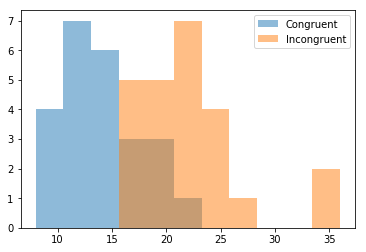

In [6]:
# histograms of both series
bins = np.linspace(8, 36, 12)
for column in stroop_df.columns:
    plt.hist(stroop_df[column], bins=bins, alpha=0.5, label=column)
plt.legend(loc='upper right')
plt.show()

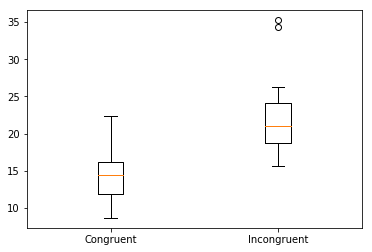

In [7]:
# box and whisker plots for both series
plt.boxplot([stroop_df[column] for column in stroop_df.columns],
            labels=[column for column in stroop_df.columns])
plt.show()

The visualizations show the same as the summary statistics. The sample means are different and most of the points bewteen samples are seperated, although there is some overlap between series. It will take a statistical test to see if there is enough difference between the congruent and incongruent data to say there is a significant difference.

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Since the samples are the same participants, the data sets are paired sets of the same measure for the same sample of the population under different conditions. The appropriate test to determine a difference in the population means for each condition is a <u>paired t-test</u>. A standard value of $\alpha = 0.05$ will be used to provide 95% certainty.

In [8]:
from scipy.stats import ttest_rel as paired_ttest
t_stat, p_value = paired_ttest(*series_list)
print "t-statistic:", t_stat
print "p-value:", p_value

t-statistic: -8.02070694411
p-value: 4.10300058571e-08


The p-value is very small (p = 4.10e-08), which is much less than the $\alpha = 0.05$ needed for 95% confidence, indicating that the result is statistically significant and we can reject the null hypothesis. The t-statistic is negative (t-stat = -8.02), which indicates that the mean time to name the text color for congruent text color and color words is less than the mean time to name incongruent text color and color word.

#### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The effect is due to interference between cognitive tasks. There have been many studies that show similar results using different tasks. For example, Hentschel added words to line drawings and had participants name the picture.$^{1}$

$^{1}$ MacLeod, Colin M. "Haifa Century of Research on the Stroop Effect: An Integrative Review" <i>Psychological Bulletin</i>. vol. 109, no. 2, 1991, pp. 163-203.